# Model Evaluation and Hyperparameter Tuning: A Hands-On Guide
Welcome to this hands-on session focused on model evaluation and optimization techniques in machine learning.

In this notebook, we will walk through practical examples of how to evaluate different types of machine learning models, including:


* **Classification**: Understanding performance through metrics like accuracy, precision, recall, F1-score, and ROC-AUC
* **Regression**: Assessing model quality using metrics such as MAE, MSE, RMSE, and R²
* **Clustering**: Measuring unsupervised learning outcomes using metrics like silhouette score and Davies-Bouldin index

To make our exploration more complete, we will also cover hyperparameter tuning in classification models using the Random Forest algorithm. We'll compare three common tuning strategies:

* **Grid Search**
* **Random Search**
* **Bayesian Optimization**

By the end of this session, you’ll gain a better understanding of how to evaluate models effectively and optimize their performance for better real-world results.

Let’s get started!

## Importing Library
Before diving into model evaluation and tuning, let's start by importing the essential libraries we’ll use throughout this notebook. These include tools for data manipulation, model building, evaluation metrics, and hyperparameter tuning.

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing, make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score,
    silhouette_score
)
from skopt import BayesSearchCV
from scipy.stats import randint

## Classification: Predicting Flower Species

We’ll begin our evaluation journey with a classification task using the classic Iris dataset, a well-known multiclass dataset that is often used for benchmarking classification algorithms.

### Dataset Description
The Iris dataset consists of **150 samples** of iris flowers from three different species:

* *Setosa*
* *Versicolor*
* *Virginica*

Each sample contains **four features**:
* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)

Our goal is to **predict the species** of an iris flower based on these features.

In [3]:
iris = load_iris(as_frame=True)
iris.frame.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### Check Data Types and Missing Values
We want to confirm that the dataset is clean and contains no missing values.

In [4]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
iris.frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Train-Test Split
To evaluate our model's performance fairly, we divide the dataset into two subsets: a training set for learning, and a test set for validation.

In [6]:
X_clf, y_clf = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

### Hyperparameter Tuning for Classification
To improve our classification model’s performance, we’ll tune the hyperparameters of a **Random Forest Classifier** using three different techniques:

#### Grid Search
Grid Search exhaustively tries all combinations of specified hyperparameters. It's simple but can be computationally expensive.

In [7]:
grid_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'log2']
}
clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), grid_params, cv=3, scoring='accuracy')
clf_grid.fit(X_train, y_train)
print("🏆 Best (Grid Search):", clf_grid.best_params_)

🏆 Best (Grid Search): {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}


#### Random Search
Random Search samples random combinations of hyperparameters from the search space. It’s faster and more scalable than grid search.

In [8]:
random_params = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 15),
    'max_features': ['sqrt', 'log2']
}
clf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), random_params, n_iter=10, cv=3, scoring='accuracy', random_state=42)
clf_random.fit(X_train, y_train)
print("🏆 Best (Random Search):", clf_random.best_params_)

🏆 Best (Random Search): {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 142}


#### Bayesian Optimization
Bayesian Optimization uses past evaluation results to choose the next set of parameters to try, making it more efficient in exploring the search space.

In [9]:
bayes_params = {
    'n_estimators': (50, 150),
    'max_depth': (3, 15),
    'max_features': ['sqrt', 'log2']
}
clf_bayes = BayesSearchCV(RandomForestClassifier(random_state=42), bayes_params, n_iter=20, cv=3, scoring='accuracy', random_state=42)
clf_bayes.fit(X_train, y_train)
print("🏆 Best (Bayesian Optimization):", clf_bayes.best_params_)

# ------------------------------
# ✅ Evaluate Final Model (Bayes)
# ------------------------------
final_clf = clf_bayes.best_estimator_
y_pred = final_clf.predict(X_test)

print("\n🎯 Classification Metrics (Bayesian Model):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

🏆 Best (Bayesian Optimization): OrderedDict([('max_depth', 8), ('max_features', 'log2'), ('n_estimators', 143)])

🎯 Classification Metrics (Bayesian Model):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### Fit Test
Check whether our model is underfit, overfit, or good fit

In [11]:
# Evaluate the model on both the training and testing sets
y_train_pred = final_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred) # y_pred is already calculated for the test set

print(f"\n📊 Model Fit Evaluation:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")


📊 Model Fit Evaluation:
Training Accuracy: 1.0000
Testing Accuracy:  1.0000


It appears that the model performs well in training & test set. We can conclude that the model is good fit

### Summary
In this section, we explored the **classification workflow** using the Iris dataset. Here's a recap of what we've accomplished:

#### Exploratory Data Analysis (EDA)
- Loaded and inspected the Iris dataset, which contains 150 samples across 3 classes with 4 numeric features.
- Visualized feature distributions and checked for missing values.
- Explored pairwise relationships between features to identify patterns.

#### Train-Test Split
- Divided the dataset into training (80%) and testing (20%) sets to evaluate generalization performance.

####  Model Evaluation Metrics
- Although the exact metrics will be computed later, we’ve prepared the data for evaluating classification performance using metrics like **accuracy**, **precision**, **recall**, and **F1-score**.

#### Hyperparameter Tuning
We optimized the hyperparameters of a **Random Forest Classifier** using three different methods:

| Method                   | Description                                                                 | Strengths                              |
|--------------------------|-----------------------------------------------------------------------------|----------------------------------------|
| **Grid Search**          | Exhaustively tries all combinations of predefined parameters                | Simple, but computationally expensive  |
| **Random Search**        | Samples random combinations from the search space                           | Faster, more scalable                  |
| **Bayesian Optimization**| Uses past evaluation results to intelligently select the next parameters    | Efficient and adaptive                 |

Each method produced a different set of "best" parameters along with cross-validation accuracy scores, which can now be used to train a final model and evaluate it on the test set.


## Regression: Predicting House Prices
In this section, we apply regression techniques to predict house prices based on features from the **California Housing dataset**.

### Dataset Description
The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features):
- average income
- housing average age
- average rooms
- average bedrooms
- population
- average occupation
- latitude
- longitude
- MedHouseVal

In [14]:
housing = fetch_california_housing(as_frame=True)
housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### Quick Exploratory Data Analysis (EDA)

For simplicity, we select **two features**:

- `MedInc`: **Median income** in the block group (in tens of thousands of dollars). This is a strong indicator of housing prices.
- `AveRooms`: **Average number of rooms** per household. It gives a sense of house size.

Our **target variable** is:
- `target`: **Median house value** (in hundreds of thousands of dollars).

In [15]:
df_reg = housing.frame[['MedInc', 'AveRooms', 'MedHouseVal']]
df_reg.describe()

MedInc      AveRooms   MedHouseVal
count  20640.000000  20640.000000  20640.000000
mean       3.870671      5.429000      2.068558
std        1.899822      2.474173      1.153956
min        0.499900      0.846154      0.149990
25%        2.563400      4.440716      1.196000
50%        3.534800      5.229129      1.797000
75%        4.743250      6.052381      2.647250
max       15.000100    141.909091      5.000010

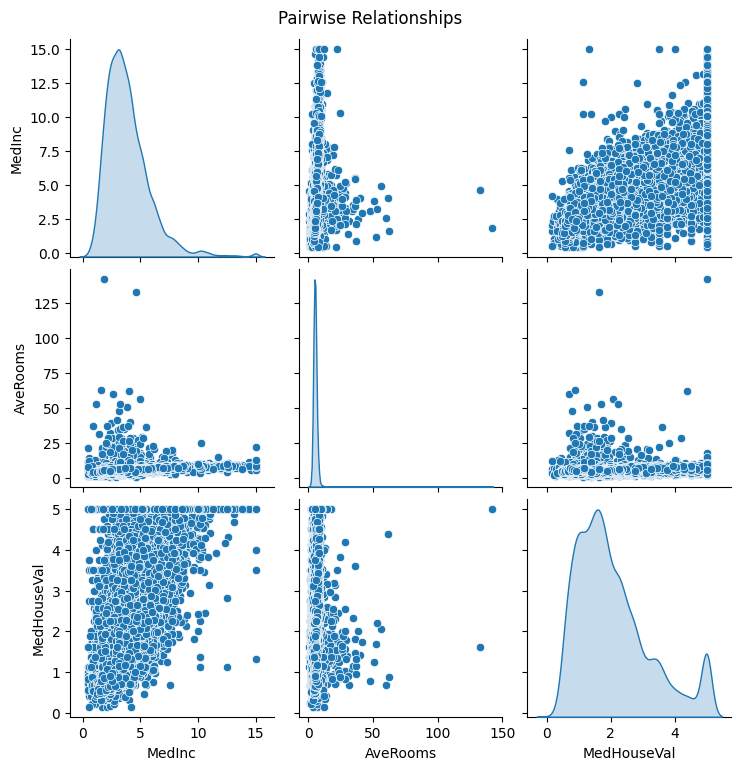

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_reg, diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

### Train Test Split
We split the data into training and testing sets to evaluate the model's generalization performance.

In [17]:
X_reg, y_reg = housing.data[['MedInc', 'AveRooms']], housing.target
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

### Model Training
We use a simple **Linear Regression** model to learn the relationship between the input features and the house prices.


In [18]:
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)

LinearRegression()

### Evaluation Metrics

After training the model, we evaluate its performance using standard regression metrics:

- **MAE (Mean Absolute Error)**: Average magnitude of prediction errors
- **MSE (Mean Squared Error)**: Average of squared differences between actual and predicted values
- **RMSE (Root Mean Squared Error)**: Square root of MSE, interpretable in the same units as the target
- **MAPE (Mean Absolute Percentage Error)**: Average absolute percentage difference between actual and predicted values
- **R² Score**: Proportion of variance in the target explained by the model


In [19]:
y_pred_r = reg.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
rmse = mse ** 0.5
mape = (abs((y_test_r - y_pred_r) / y_test_r)).mean() * 100

print("\n🏠 Regression Metrics (House Price Prediction):")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE (%):", mape)
print("R² Score:", r2_score(y_test_r, y_pred_r))



🏠 Regression Metrics (House Price Prediction):
MAE: 0.624682807713972
MSE: 0.7021550469058006
RMSE: 0.8379469236806115
MAPE (%): 38.67672677554309
R² Score: 0.4641710652437856


### Fit Test
Check whether our model is underfit, overfit, or good fit

In [21]:
# prompt: Add code to check the fit of the model (overfit, underfit, good fit)

# Evaluate the model on both the training and testing sets
y_train_pred_r = reg.predict(X_train_r)
train_r2 = r2_score(y_train_r, y_train_pred_r)
test_r2 = r2_score(y_test_r, y_pred_r)

print(f"\n📊 Model Fit Evaluation (Regression):")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score:  {test_r2:.4f}")


📊 Model Fit Evaluation (Regression):
Training R² Score: 0.4831
Testing R² Score:  0.4642


It appears that the R^2 for training and test set is not good. We could say that our model is underfit - suggesting that the model is  too simple.

### Summary

- The **R² score of 0.48 & 0.46** in train and test set indicates the model explains less than half of the variability in house prices, it also states that the model is underfit suggesting room for improvement.
- The **high MAPE (~39%)** implies the model’s percentage errors are quite large on average, so predictions are not very precise.
- Errors measured by MAE and RMSE suggest typical deviations around 60-80 thousand dollars (scaled units).
- Using only two features (`MedInc`, `AveRooms`) is likely too simplistic; incorporating more relevant features or nonlinear models could boost accuracy.
- Overall, this baseline linear regression provides a starting point, but more advanced models and feature engineering are recommended for better house price prediction.

## Clustering: Identifying Groups in Synthetic Data

### Dataset Description

We generate a synthetic dataset using `make_blobs`, which creates clusters of points centered around predefined centers. Here:

- **300 samples** are generated.
- **4 clusters (centers)** are created with a standard deviation of 0.6.
- The dataset consists of 2-dimensional points, suitable for clustering.

This dataset simulates distinct groups which we want to identify using clustering algorithms.

In [ ]:
X_cluster, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
pd.DataFrame(X_cluster, columns=['Feature 1', 'Feature 2']).head()

Feature 1  Feature 2
0  -9.113944   6.813616
1  -9.354576   7.092790
2  -2.015671   8.281780
3  -7.010236  -6.220843
4 -10.061202   6.718671

### Exploratory Data Analysis (EDA)

We start by visualizing the raw data points to get an initial sense of cluster separation.


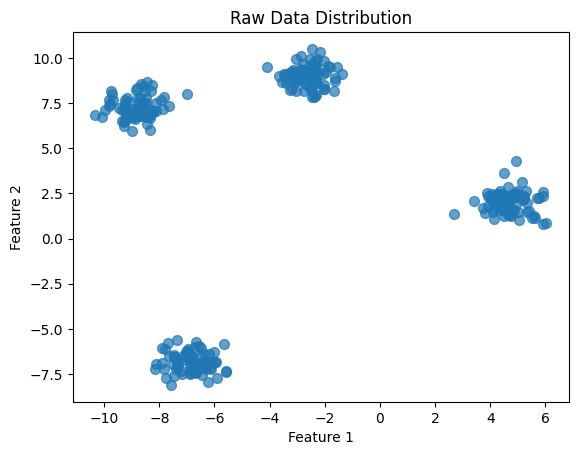

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_cluster[:, 0], X_cluster[:, 1], s=50, alpha=0.7)
plt.title("Raw Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Choosing the Number of Clusters

Using the **Elbow Method**, we plot the inertia (sum of squared errors) for k values from 1 to 9. The "elbow" point suggests the optimal number of clusters.


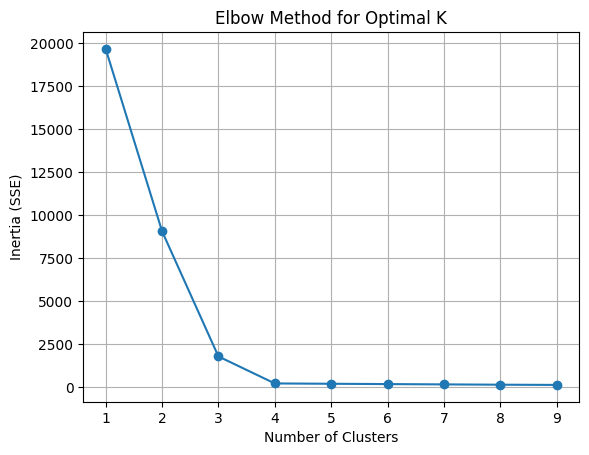

In [ ]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_cluster)
    inertias.append(model.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.grid()
plt.show()

From the plot, we observe an elbow at **k = 4**, indicating that 4 clusters may best balance model complexity and data fit.

### Clustering with K = 4

We fit the KMeans model with **4 clusters** and visualize the assigned clusters.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_cluster)

plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("KMeans Clustering with k=4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
print("\n🔗 Clustering Metrics:")
print("Silhouette Score:", silhouette_score(X_cluster, labels))
print("Inertia (SSE):", kmeans.inertia_)


🔗 Clustering Metrics:
Silhouette Score: 0.8756469540734731
Inertia (SSE): 203.89074684058335


### Summary

- The **Silhouette Score** of **0.876** is very high, indicating that the clusters are well-separated and data points are appropriately assigned to their clusters.
- The **Inertia (SSE)** value of approximately **204** reflects the total within-cluster variance; since we chose **k=4** based on the elbow method, this inertia is reasonably low, indicating compact clusters.
- The high silhouette score and clear cluster visualization confirm that KMeans with 4 clusters captures the underlying data structure effectively.
- Overall, the clustering model performs very well on this synthetic dataset, demonstrating key principles of cluster evaluation and selection.

